Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

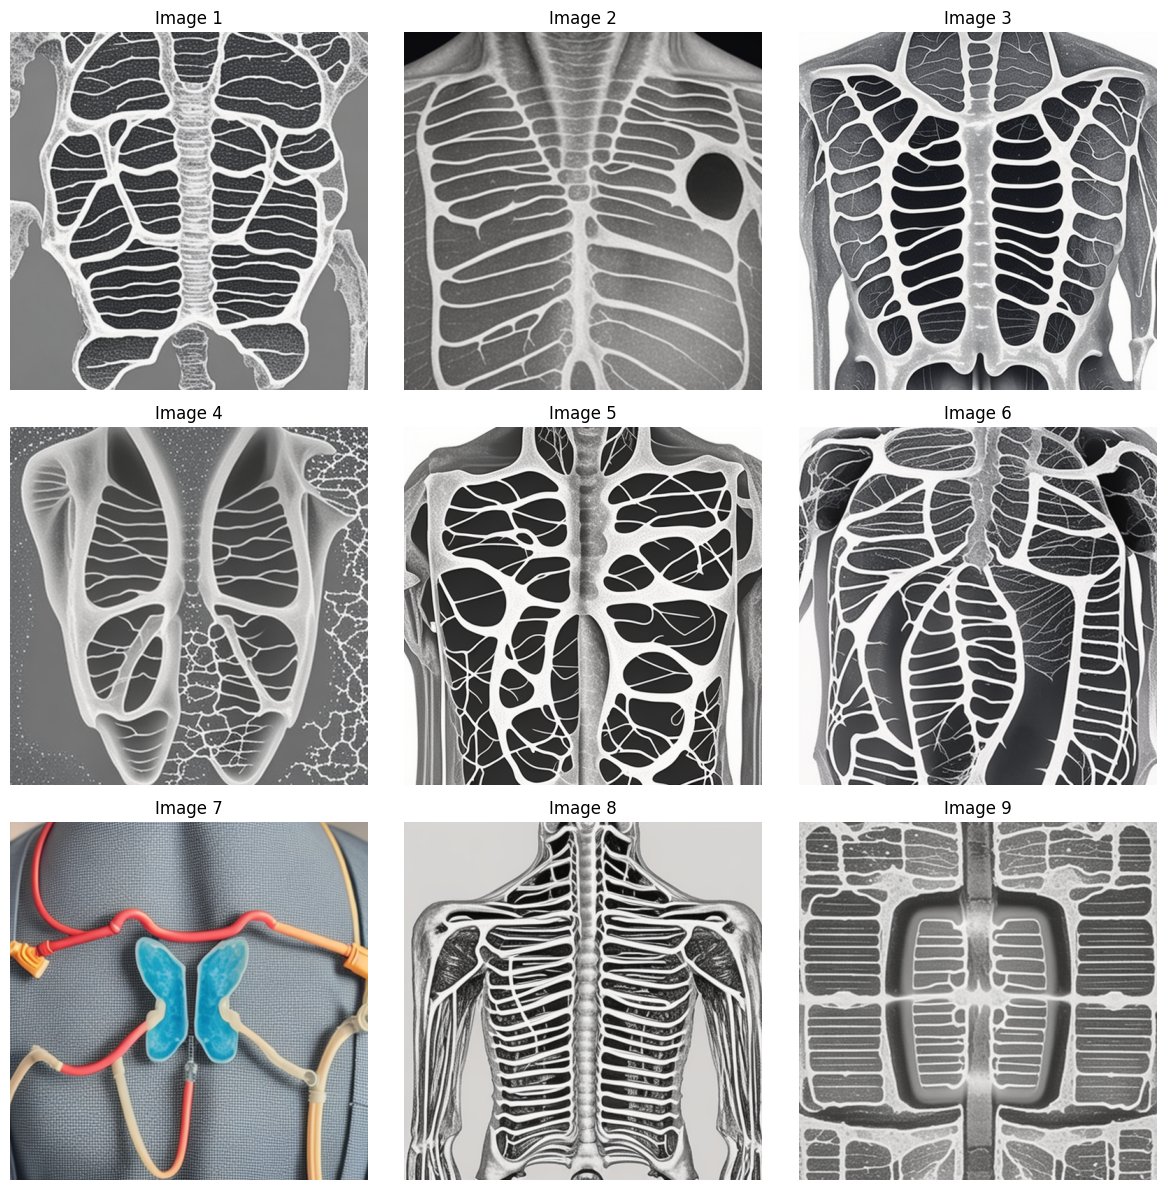

In [2]:
import torch
from diffusers import AutoPipelineForText2Image
from PIL import Image
import os
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sd-turbo",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)

pipe = pipe.to(device)
pipe.safety_checker = None

prompts = [
    "Chest X-ray of a healthy elderly patient, mild age-related changes, clear lungs, no pathological findings.",
    "Chest X-ray showing patchy infiltrates consistent with atypical pneumonia",
    "Chest X-ray with ground-glass opacities throughout both lungs.",
    "Chest X-ray with bilateral pleural effusion, fluid levels present",
    "Chest X-ray showing pulmonary fibrosis with reticular opacities and reduced lung volume.",
    "Chest X-ray with prominent pulmonary vessels and mild interstitial edema.",
    "Chest X-ray with chest tube placed for pneumothorax management.",
    "Chest X-ray in erect position with full lung expansion",
    "Chest X-ray showing variation in brightness and contrast due to different imaging equipment."
]

output_dir = "synthetic_image_dataset"
os.makedirs(output_dir, exist_ok=True)

images = []

for idx, prompt in enumerate(prompts):
    image = pipe(
        prompt=prompt,
        num_inference_steps=4,
        guidance_scale=0.0,
        height=512,
        width=512
    ).images[0]

    image.save(f"{output_dir}/image_{idx+1}.png")
    images.append(image)

rows = 3
cols = 3

plt.figure(figsize=(12, 12))

for i, img in enumerate(images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Image {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()
